# Curva Característica do Item

A seguinte sequência de comandos na linguagem de programação Python gera o gráfico abaixo para ilustrar a equação [[ref1](https://on-demand.gputechconf.com/gtcdc/2017/presentation/dc7176-lei-chen-fast-item-response-theory-irt-model-estimation-by-using-gpus.pdf)].
 
$$P(X_{ij}=1|\theta_j) = c_i + \frac{1-c_i}{1 + e^{-Da_j(\theta_j-b_i))}}$$

Para rodar as próximas células de código, basta fazer uma cópia deste arquivo e abrir no GDrive.

In [ ]:
def plot_IRT(a,b,c,D):
  import math, numpy as np, matplotlib.pyplot as plt
  theta = 5
  x= np.arange(-theta, theta, .1)
  irt = c + (1-c)/(1+np.exp(-D*a*(x-b)))
  plt.title("TRI - Curva Característica do Item (CCI)")
  plt.ylabel("Prob. Respostas Correta")

  if -1 < b <= 1:
    plt.xlabel("Habilidade: b próximo de %d => item médio" % 0)
  elif 1 < b <= 3:
    plt.xlabel("Habilidade: b próximo de %d => item difícil" % 2)
  elif b > 3:
    plt.xlabel("Habilidade: b > %d => item muito difícil" % 3)
  elif -3 < b <= -1:
    plt.xlabel("Habilidade: b próximo de %d => item fácil" % -2)
  elif b <= -3:
    plt.xlabel("Habilidade: b < %d => item muito fácil" % -3)

  plt.vlines(b, 0, irt[(b+theta)*10], linestyle=':')
 
  x1 = b
  y1 = irt[(x1+theta)*10]
  xrange = np.arange(x1-1, x1+1, .1)
  plt.scatter(x1, y1, color='r', s=50)
  def line(a, x, x1, y1):
    return a*(x - x1)/3 + y1
  plt.plot(xrange, line(a,xrange, x1, y1), 'r--', linewidth = 3)
 
  if a <= .5:
    plt.text(b+.4, irt[(b+theta)*10]+.03, 'a=%.1f - não separa bem hab.'%a)
  elif a >= 1.5:
    plt.text(b+.4, irt[(b+theta)*10]+.03, 'a=%.1f - separa bem hab.'%a)
  else:
    plt.text(b+.4, irt[(b+theta)*10]+.03, 'a=%.1f'%a)

  plt.text(b+.1, 0.05, 'b=%.1f'%b)
  plt.text(min(x), c+.05, 'c=%.1f'%c)
  plt.grid()
  _=plt.plot(x,irt, 'b-', linewidth = 1)

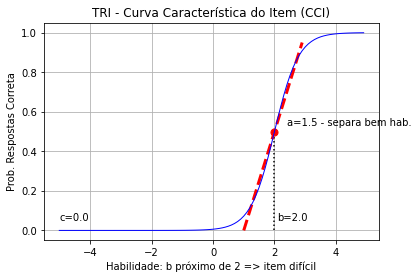

In [ ]:
a = 1.5   # mais vertical a linha vermelha => mais discriminate
b = 2   # mais à direita do 0, maior a chance de errar => questão difícil
c = 0.0 # chute
D = 1.7 # fator de escala
plot_IRT(a,b,c,D)

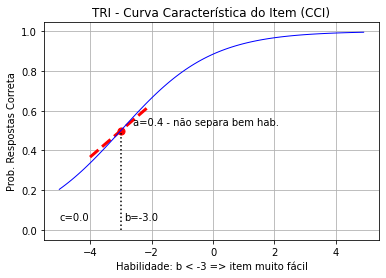

In [ ]:
a = 0.4  # mais vertical a linha vermelha => mais discriminate
b = -3   # mais à esquerda do 0, maior a chance de acertar => questão fácil
c = 0.0  # chute
D = 1.7  # fator de escala
plot_IRT(a,b,c,D)

In [ ]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
## IF NOT available
%%R
if(!require(data.table)){install.packages('data.table')}
if(!require(ltm)){install.packages('ltm')}
if(!require(irtoys)){install.packages('irtoys')}
if(!require(stringi)){install.packages('stringi')}

In [ ]:
import glob
import pandas as pd

# get data file names
url ='http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ.zip' # all
url ='http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ10.zip' # 10
url ='http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ100.zip' # 100
url ='http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ1000.zip' # 1000
url ='http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ10000.zip' # 10000
url ='http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ100000.zip' # 100000

In [ ]:
!wget http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ10000.zip

--2021-06-27 17:26:36--  http://vision.ufabc.edu.br/MCTest/ENEM/2019/DADOS/MATRIZ10000.zip
Resolving vision.ufabc.edu.br (vision.ufabc.edu.br)... 177.104.60.18
Connecting to vision.ufabc.edu.br (vision.ufabc.edu.br)|177.104.60.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1439904 (1.4M) [application/zip]
Saving to: ‘MATRIZ10000.zip’

MATRIZ10000.zip     100%[===================>]   1.37M   731KB/s    in 1.9s    

2021-06-27 17:26:39 (731 KB/s) - ‘MATRIZ10000.zip’ saved [1439904/1439904]



In [ ]:
import zipfile

local_zip = './MATRIZ10000.zip' # 152 MB
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()
path = './MATRIZ/'

In [39]:
%%R
file_list <- Sys.glob("./MATRIZ/*.csv")
for (i in 1:length(file_list)){
  f <- file_list[i]
  print(f)
  data <- fread(f)
  print(dim(data))
  m3PL = tpm(data, type="latent.trait", IRT.param=TRUE, max.guessing = 0.2)
  data.par <- est(data, model="3PL", engine="ltm")
  write.csv(data.par$est, file = paste(f,'_TRI.csv',sep=""))
}

[1] "./MATRIZ/514_010000_data.csv"
[1] 9991   45


In [37]:
!zip -r tri.zip /content/MATRIZ/*TRI.csv

  adding: content/MATRIZ/515_010000_data.csv_TRI.csv (deflated 49%)
  adding: content/MATRIZ/516_010000_data.csv_TRI.csv (deflated 49%)
  adding: content/MATRIZ/517_010000_data.csv_TRI.csv (deflated 49%)
  adding: content/MATRIZ/518_010000_data.csv_TRI.csv (deflated 49%)


In [38]:
files.download('tri.zip') 

NameError: ignored

In [ ]:
%%R
if(FALSE) {
  file_list <- Sys.glob("./MATRIZ/*.csv")
  for (i in 1:length(file_list)){
    print(file_list[i])
    f <- file_list[i]
    data <- fread(f)
    print(dim(data))
    m3PL = tpm(data, type="latent.trait", IRT.param=TRUE, max.guessing = 0.2)
    Grade <- c(colSums(data)/1000) #  each questions's 
    #all.sd <- apply(data, 1,sd)
    for (id in 1:45) {
      #print(id)
      #print(Grade[id])
      #print(all.sd[id])
      #sd <- format(round(all.sd[id] , 3), nsmall = 3)
      #par(mfrow=c(1,2))
      idstr <- sprintf("%02d", id)
      print(paste(stri_sub(f,1,-5),"_",idstr,".png",sep=""))
      png(filename=paste(stri_sub(f,1,-5),"_",idstr,".png",sep=""))
      plot(m3PL, 
          type="ICC", 
          items=id, 
          main=paste(substr(f,17,26),'; q =',id,'; media =',Grade[id]))
      dev.off()
    }
  }
}